# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-v1.2.0-nccl-n1/   gpu-v1.4.0.ngc-nccl-n1/    hsw-v1.2.0-mpi-n1/
gpu-v1.3.1-nccl-n1/   gpu-v1.4.0.ngc-nccl-n16/   hsw-v1.3.1-mpi-n1/
gpu-v1.4.0-nccl-n1/   gpu-v1.4.0.ngc-nccl-n2/    hsw-v1.4.0-mpi-n1/
gpu-v1.4.0-nccl-n16/  gpu-v1.4.0.ngc-nccl-n4/    knl-v1.1.0-mpi-n1/
gpu-v1.4.0-nccl-n2/   gpu-v1.4.0.ngc-nccl-n8/    knl-v1.2.0-mpi-n1/
gpu-v1.4.0-nccl-n4/   gpu-v1.5.0rc.ngc-nccl-n1/  knl-v1.3.1-mpi-n1/
gpu-v1.4.0-nccl-n8/   hsw-v1.1.0-mpi-n1/         knl-v1.4.0-mpi-n1/


In [5]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.5.0rc.ngc-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.4.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.2.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.4.0.ngc-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.3.1-nccl-n1/results.txt']

In [7]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True, sort=False)

results

,backend,hardware,inference_rate,model,ranks,train_rate,version
0,nccl,gpu,14347.383083,lstm,1,7590.546914,v1.5.0rc.ngc
1,nccl,gpu,3288.981366,alexnet,1,436.293406,v1.5.0rc.ngc
2,nccl,gpu,940.938216,resnet50,1,298.585267,v1.5.0rc.ngc
3,nccl,gpu,7204.894494,cnn3d,1,1605.243148,v1.5.0rc.ngc
4,nccl,gpu,17251.248513,lstm,1,8776.446768,v1.4.0
5,nccl,gpu,2616.290535,alexnet,1,1066.771605,v1.4.0
6,nccl,gpu,900.584429,resnet50,1,295.817233,v1.4.0
7,nccl,gpu,5810.381650,cnn3d,1,1309.448036,v1.4.0
8,nccl,gpu,13904.552561,lstm,1,7822.898889,v1.2.0
9,nccl,gpu,2668.831966,alexnet,1,981.855660,v1.2.0


## Training throughput comparisons

In [8]:
models = results.model.unique()

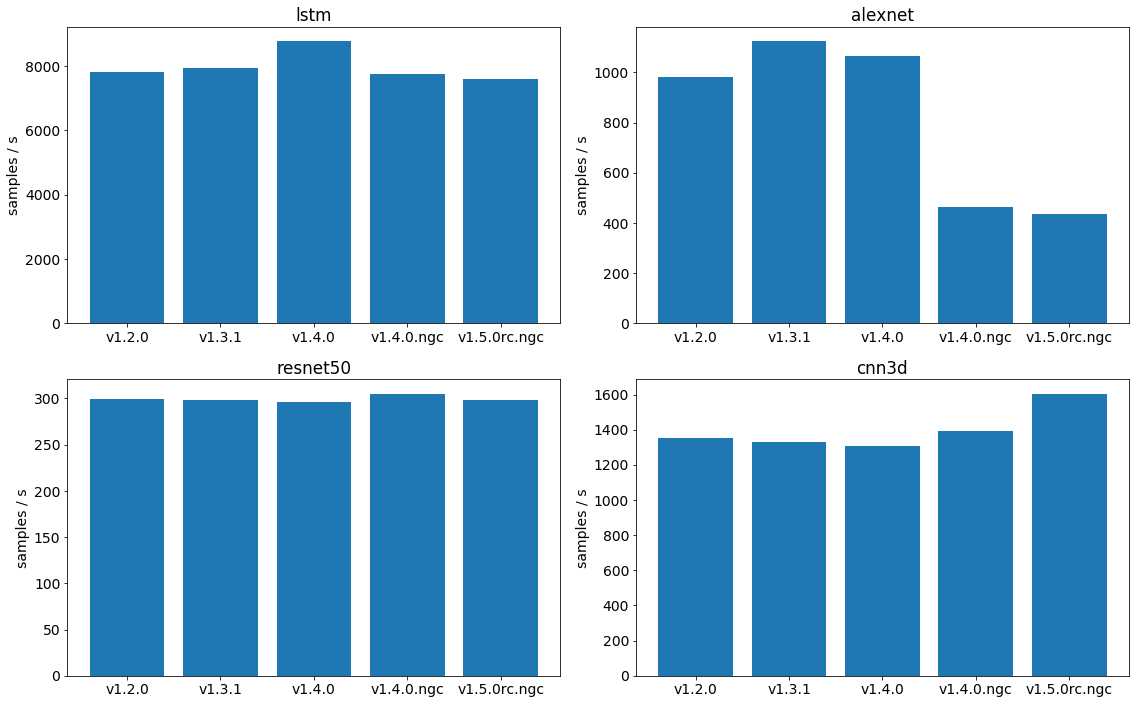

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

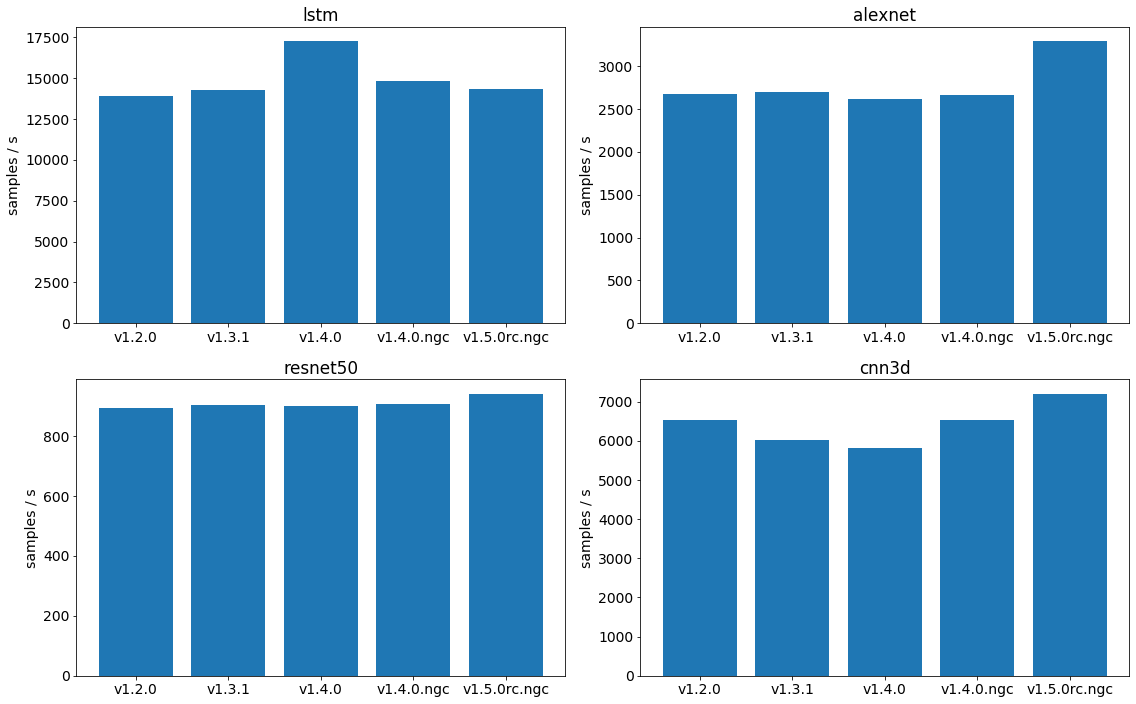

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()